# Titanic Challenge

## Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Background

This is my first attempt at the challenge.

In [1]:
# packages for interacting with the data
import numpy as np
import pandas as pd

# packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline


In [2]:
# Get the data into pandas dataframes
training = pd.read_csv('data/train.csv')
testing = pd.read_csv('data/test.csv')

Now that I have the data, I need to begin analyzing the it.  To do this I am going to get a preview of the data using the head command. 

In [3]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


Thoughts after looking this information:
- PassengerId: is basically an index number that will have no impact on whether or not they survived.  Will be ignored when building model
- Survived: is the categorical feature that we are trying to test.  It is in the binary form 0=no and 1=yest
- Pclass: lists the class of the passenger.  From the information we are given,  we know that the upper clas passengers (1) were more likely to survive than the lowest class passengers(3).  This will be used when building the model
- Name: string in the form Last, Title First Middle (Another name). By itself is useless, but by taking information such as the last name and title, we can
- Sex: string listing the sex of the passenger as either male or female.  Can be changed to binary 1 and 0.   It is stated that women were more likely to survive.
- Age: gives the numerical age of the passenger. It is stated that children were more likely to survive.  
- SibSp:  gives the number of siblings and spouses aboard
- Parch: gives the number of parents and children aboard.  This could be combined with SibSp to get the total family size.
- Ticket:  gives the ticket number.  
- Fare: How much the passenger paid for the ticket.
- Cabin: Which cabin the passenger was staying.  Is missing many values.  Given that the accident happened in the middle of the night, where the passengers were staying could 
- Embarked: Port where the passenger boarded. C = Cherbourg, Q = Queenstown, S = Southampton

There is a lot of missing values.  I am going to use the info command to figure out how much of the information is missing for each column in both data sets

In [4]:
training.info()
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

From this I see that Cabin is missing too much information(~77%). I will not attempt to fill in the missing values.  There might be a way of filling in the missing information by assuming families stayed in the same cabin but I am going to stick with a simpler model for now.  

Time to start cleaning up the data.  I am going to start with the simplest ones first. To make things take a little less time, I am going to combine the two data sets and loop through the commands for each one.

In [5]:
Combined_data = [training, testing]

In [6]:
# Run through each data set and clean up
for data_set in Combined_data:
    # change sex to numerical values instead of strings
    data_set['Sex'] = data_set['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    
    # combine sibsp and parch to get total family size.  Add 1 for the passenger
    data_set['Family'] = data_set['SibSp'] + data_set['Parch'] + 1
    
    # Apply a number for the port that the passenger embarked. Since S is where the most passengers embarked
    # I set the missing info as S
    embarked = {'S':1, 'Q':2, 'C':3}
    data_set['Embarked'] = data_set['Embarked'].apply(lambda x: embarked[x] if type(x)==str else 1)
    
#     med_fare = comb['Fare'].median()
#     data_set['Fare'] = data_set['Fare'].fillna(med_fare)

In [7]:
# Parse the passenger's title from 'Name'
import re

def get_title(name):
    """ Use regex to get the title form the passenger's name"""
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        title = title_search.group(1)
        # print(title)
        return title
    return ""
    
for data_set in Combined_data:
    data_set['Title'] = data_set['Name'].apply(lambda x: get_title(x))

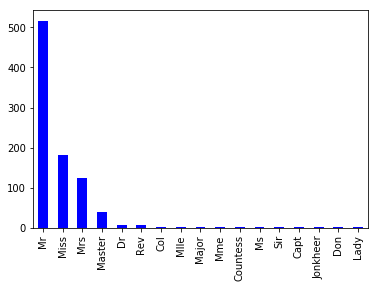

In [8]:
training['Title'].value_counts().plot(kind='bar')
# _training = pd.DataFrame([training['Title'].value_count(), training['Survived']])
# _training.plot.bar(stacked=True)

Looking at the chart we can see that there are four categories of importance(Mr. Miss., Mrs. Master).  Ms., Mlle., Miss., and Lady we can combine into Miss, Mme can be added to Mrs., and Sir can be added to Mr.  Everything else I will combine to Misc.  Since titles tend to correspond with age(Mr is a male adult and master is a male child), I will use median age of each group to fill in the missing ages

In [9]:
comb = pd.concat(Combined_data)
comb.groupby(['Title'])['Age'].median()

Title
Capt        70.0
Col         54.5
Countess    33.0
Don         40.0
Dona        39.0
Dr          49.0
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       4.0
Miss        22.0
Mlle        24.0
Mme         24.0
Mr          29.0
Mrs         35.5
Ms          28.0
Rev         41.5
Sir         49.0
Name: Age, dtype: float64

In [10]:
for data_set in Combined_data:
    # Combine to Miss
    data_set['Title'] = data_set['Title'].replace(['Lady', 'Ms', 'Mlle'], 'Miss')
    
    # Combine to Mrs
    data_set['Title'] = data_set['Title'].replace('Mme', 'Mrs')
    
    # Combine to Mr
    data_set['Title'] = data_set['Title'].replace('Sir', 'Mr')
    
    # Combine to Misc
    data_set['Title'] = data_set['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona', 
                                                   'Dr', 'Jonkheer', 'Major', 'Rev'], 'Misc')
    
    # Fill missing age values with the median of the Title group
    data_set['Age'] = data_set.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [11]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Family         891 non-null int64
Title          891 non-null object
dtypes: float64(2), int64(8), object(4)
memory usage: 104.4+ KB


In [12]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
Family         418 non-null int64
Title          418 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 45.7+ KB


Still missing a value for Fare.  I am going to replace it based off of the median of the passenger class.

In [13]:
testing['Fare'] = testing.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [14]:
# Remove unnecessary mo
training = training.drop(['SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)
testing = testing.drop(['SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)

In [15]:
testing.head(5)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family,Title
0,892,3,"Kelly, Mr. James",1,34.5,7.8292,2,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,7.0000,1,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,9.6875,2,1,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,8.6625,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,12.2875,1,3,Mrs


In [16]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']
X = training[features]
y = training['Survived']

In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [18]:
X = testing[features]
#y = testing['Survived']
testing['Survived'] = np.round(model.predict(X),0)

In [19]:
testing.to_csv('data/model_prediction.csv', columns=['PassengerId','Survived'], index=False)